In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv',encoding="latin-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [5]:
df = df.rename(columns={'v1':'Target','v2':'Text'})

In [6]:
df.describe()

,Target,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df['Target'].value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

In [8]:
df['message_length']= df['Text'].apply(lambda x: len(x.split(" ")))

In [9]:
df.head()

,Target,Text,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [10]:
df_ham = df[df['Target']=='ham']
df_spam = df[df['Target']=='spam']

Text(0.5, 0, 'message length')

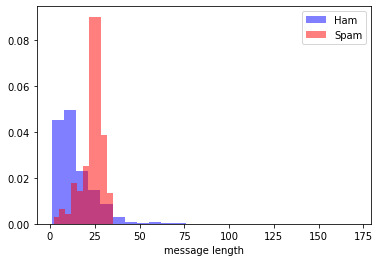

In [11]:
plt.hist(df_ham['message_length'],25,histtype='bar',color='blue',density=True,alpha=0.5)
plt.hist(df_spam['message_length'],histtype='bar',color='red',density=True,alpha=0.5)
labels= ['Ham',"Spam"]
plt.legend(labels)
plt.xlabel('message length')

In [12]:
df_ham = df_ham['message_length'].value_counts()

In [13]:
df_spam = df_spam['message_length'].value_counts()

In [14]:
df_ham = pd.DataFrame(df_ham)
df_spam = pd.DataFrame(df_spam)

Text(0.5, 0, 'message length')

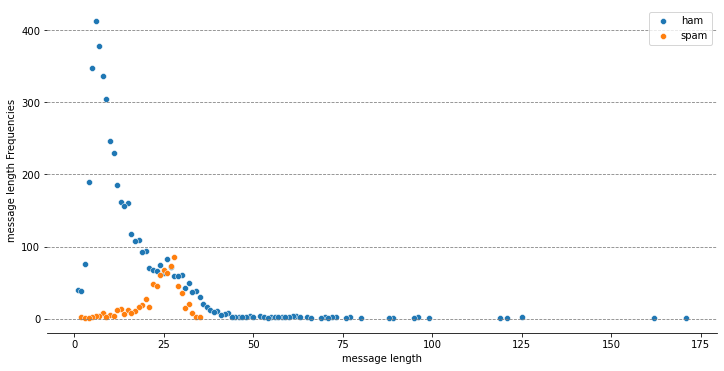

In [15]:
fig = plt.figure(figsize=(12,6))
ax = plt.axes()
for i in ['left','top','right']:
    ax.spines[i].set_visible(False)
ax.grid(linestyle='--',axis='y',color='gray')
sns.scatterplot(data=df_ham,x=df_ham.index,y=df_ham['message_length'],label='ham')
sns.scatterplot(data=df_spam,x=df_spam.index,y=df_spam['message_length'],label='spam')
plt.ylabel('message length Frequencies')
plt.xlabel('message length')

## Learning

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
df['Target']=le.fit_transform(df['Target'])

In [18]:
X = df['Text']
y = df['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [19]:
cv = CountVectorizer(min_df=5,stop_words='english').fit(X_train)
X_train_vector = cv.transform(X_train)
X_test_vector = cv.transform(X_test)

In [20]:
print(repr(X_train_vector))

<4179x1285 sparse matrix of type '<class 'numpy.int64'>'
	with 23636 stored elements in Compressed Sparse Row format>


## Finding best models

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#import xgboost as xgb

In [22]:
models=[('KNeighbors', KNeighborsClassifier()),('LogisticRegression',LogisticRegression())
        ,('naive_bayes',MultinomialNB()),('RandomForest',RandomForestClassifier()),('SVM',SVC())]
results=[]
names=[]
for name,model in models:
    scores = cross_val_score(model,X_train_vector,y_train,cv=5)
    results.append(scores)
    names.append(name)
    print(name,'\n','mean:',scores.mean(),'standard deviation:',scores.std())

KNeighbors 
 mean: 0.9198366902558519 standard deviation: 0.0036413967356550537
LogisticRegression 
 mean: 0.9796590550955507 standard deviation: 0.004966685320841653
naive_bayes 
 mean: 0.9801383835200413 standard deviation: 0.0047020595709705675
RandomForest 
 mean: 0.9794189611208205 standard deviation: 0.0045135989988483805
SVM 
 mean: 0.9779844139472251 standard deviation: 0.004189379955534503


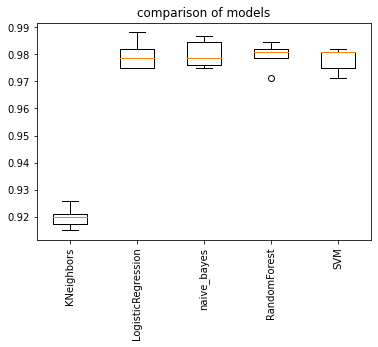

In [23]:
plt.boxplot(results,labels=names);
plt.title('comparison of models')
plt.xticks(rotation=90);

In [40]:
dic={'KNeighbors':KNeighborsClassifier(),'LogisticRegression':LogisticRegression()
        ,'naive_bayes':MultinomialNB(),'RandomForest':RandomForestClassifier(),'SVM':SVC()}
accuracy = []
names = []
for name in dic:
    print(f'The model is: {name}')
    dic[name].fit(X_train_vector,y_train)
    yp=dic[name].predict(X_test_vector)
    accuracy.append(accuracy_score(yp,y_test))
    names.append(name)
    print(classification_report(yp,y_test))

The model is: KNeighbors
              precision    recall  f1-score   support

           0       1.00      0.92      0.95      1303
           1       0.44      0.93      0.60        90

    accuracy                           0.92      1393
   macro avg       0.72      0.93      0.78      1393
weighted avg       0.96      0.92      0.93      1393

The model is: LogisticRegression
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1232
           1       0.84      0.99      0.91       161

    accuracy                           0.98      1393
   macro avg       0.92      0.98      0.95      1393
weighted avg       0.98      0.98      0.98      1393

The model is: naive_bayes
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1207
           1       0.91      0.94      0.92       186

    accuracy                           0.98      1393
   macro avg       0.95      0.96      0.96 

Text(0.5, 0, 'Accuracy Score')

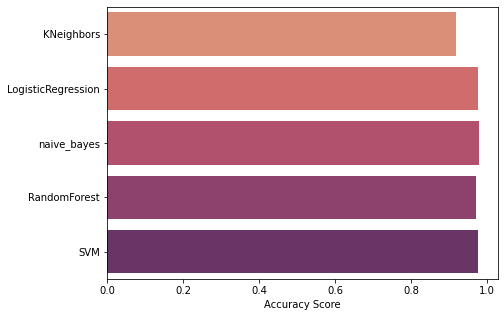

In [41]:
plt.figure(figsize=(7,5))
sns.barplot(y=names,x=accuracy,palette="flare")
plt.xlabel('Accuracy Score')

## Finding best param

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(MultinomialNB(),param_grid,cv=5)
grid.fit(X_train_vector,y_train)
print('best score:',grid.best_score_)
print('best param:',grid.best_params_)

best score: 0.9825321605592643
best param: {'alpha': 10}


In [25]:
grid.score(X_test_vector,y_test)

0.9770279971284996

### TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer().fit(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

In [29]:
dic={'KNeighbors':KNeighborsClassifier(),'LogisticRegression':LogisticRegression()
        ,'naive_bayes':MultinomialNB(),'RandomForest':RandomForestClassifier(),'SVM':SVC()}
accuracy_tf = []
names = []
for name in dic:
    print(f'The model is: {name}')
    dic[name].fit(X_train_tf,y_train)
    yp=dic[name].predict(X_test_tf)
    accuracy_tf.append(accuracy_score(yp,y_test))
    names.append(name)
    print(classification_report(yp,y_test))

The model is: KNeighbors
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1328
           1       0.34      1.00      0.51        65

    accuracy                           0.91      1393
   macro avg       0.67      0.95      0.73      1393
weighted avg       0.97      0.91      0.93      1393

The model is: LogisticRegression
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1251
           1       0.74      0.99      0.85       142

    accuracy                           0.96      1393
   macro avg       0.87      0.98      0.91      1393
weighted avg       0.97      0.96      0.97      1393

The model is: naive_bayes
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1258
           1       0.71      1.00      0.83       135

    accuracy                           0.96      1393
   macro avg       0.85      0.98      0.90 

In [30]:
names

['KNeighbors', 'LogisticRegression', 'naive_bayes', 'RandomForest', 'SVM']

Text(0.5, 0, 'Accuracy Score')

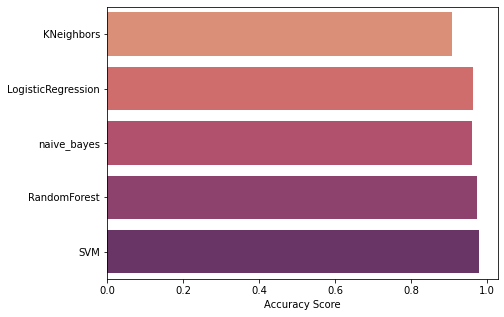

In [39]:
plt.figure(figsize=(7,5))
sns.barplot(y=names,x=accuracy_tf,palette="flare")
plt.xlabel('Accuracy Score')

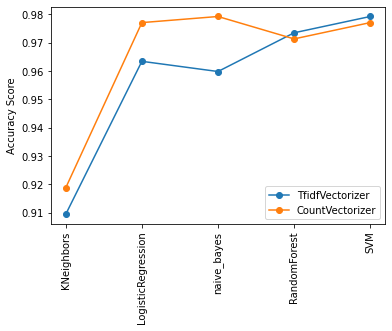

In [75]:
plt.plot(names,accuracy_tf,'o-',label='TfidfVectorizer')
plt.plot(names,accuracy,'o-',label='CountVectorizer')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=90);
plt.legend()